Searching for galaxy spectra near this sky position...
Found 1 galaxy spectra!


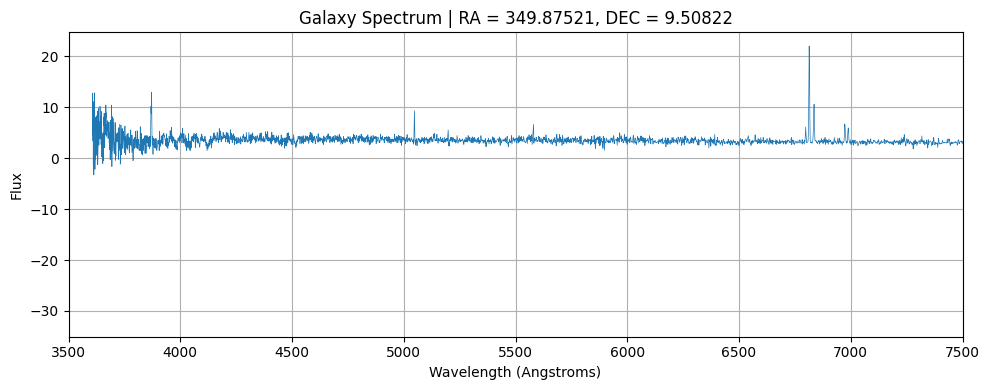

In [1]:
# Required libraries

from astroquery.sdss import SDSS

from astropy import coordinates as coords

from astropy.io import fits

import astropy.units as u

import matplotlib.pyplot as plt

import numpy as np



# === Step 1: Set your galaxy coordinates (RA and DEC) ===



# Example galaxy: NGC 7609 — has strong H-alpha line

RA = 349.87521  # Right Ascension (in degrees)

DEC = 9.50822   # Declination (in degrees)



# Second one to try!

#RA = 209.19208  # 13h 51m 46.10s → ~209.19208°

#DEC = 10.43583  # +10° 26′ 09.0″ → ~10.43583°



SEARCH_RADIUS = 0.02



# === Step 2: Tell the computer where to look in the sky ===

position = coords.SkyCoord(ra=RA, dec=DEC, unit='deg')

print("Searching for galaxy spectra near this sky position...")



# === Step 3: Ask SDSS for any galaxy spectra at this position ===

try:

    results = SDSS.query_region(position, radius=SEARCH_RADIUS * u.deg, spectro=True)

except Exception as e:

    print("That coordinate didn't work!")





# If nothing is found, stop

if results is None or len(results) == 0:

    print("No galaxy spectra found here.")

    exit()



print(f"Found {len(results)} galaxy spectra!")



# === Step 4: Get the first available spectrum ===

first = results[0]

plate = int(first['plate'])

mjd = int(first['mjd'])

fiberID = int(first['fiberID'])



print("Downloading the spectrum...")

spectrum = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiberID)[0]



# === Step 5: Plot the spectrum ===

hdu = spectrum[1]  # The data is in the second extension

flux = hdu.data['flux']

loglam = hdu.data['loglam']

wavelength = 10**loglam  # Convert from log to linear scale



# Optional: Get the redshift from the header

z = spectrum[0].header.get('Z', 'unknown')



# Now plot!

plt.figure(figsize=(10, 4))

plt.plot(wavelength, flux, lw=0.5)

plt.title(f"Galaxy Spectrum | RA = {RA}, DEC = {DEC}")

plt.xlabel("Wavelength (Angstroms)")

plt.ylabel("Flux")

plt.xlim([3500, 7500])

plt.grid(True)

plt.tight_layout()

plt.show()